In [ ]:
from IPython.display import display
import pandas as pd
data = pd.read_csv('/data/data_pre_BTL.csv')
display(data.head(5))

,datetime,temp,dewpoint,maxtemp,mintemp,precipitation,humidity,windspeed,winddeg
0,1/1/2023,14.16,9.77,19.33,9.40,0.010,76.24,1.82,24.4
1,1/2/2023,14.27,11.14,18.47,9.99,0.730,82.32,2.55,44.3
2,1/3/2023,14.76,9.85,18.88,10.95,0.130,73.39,2.07,27.7
3,1/4/2023,15.89,12.86,20.89,12.52,0.625,83.76,1.77,118.7
4,1/5/2023,17.14,14.35,21.10,13.35,0.625,84.15,2.28,42.7


In [ ]:
df_normal = pd.read_csv('/data/datanormal_maxtemp_BTL.csv')
display(df_normal)

,maxtemp,temp,dewpoint,mintemp
0,0.280184,0.276152,0.299203,0.244596
1,0.251969,0.280561,0.353785,0.268215
2,0.265420,0.300200,0.302390,0.306645
3,0.331365,0.345491,0.422311,0.369496
4,0.338255,0.395591,0.481673,0.402722
...,...,...,...,...
887,0.756562,0.874549,0.966135,0.911529
888,0.761155,0.890581,0.987251,0.941553
889,0.722441,0.881764,0.994422,0.951161
890,0.604003,0.824449,0.948207,0.902722


In [31]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Chọn biến
features = ['maxtemp','temp','dewpoint','mintemp']
data_features = df_normal[features].values

# Chọn window
window_size = 9
X_train, y_train = [], []

for i in range(len(data_features) - window_size):
    X_train.append(data_features[i:i + window_size])
    y_train.append(data_features[i + window_size])

X_train = np.array(X_train)
y_train = np.array(y_train)

# Reshape dữ liệu cho mô hình LSTM
X_train = X_train.reshape((X_train.shape[0], window_size, X_train.shape[2]))

In [32]:
# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(64))
model.add(Dense(24))
model.add(Dense(len(features)))
model.compile(optimizer='adam', loss='mse')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 9, 128)         │        68,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 24)             │         1,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,164 (465.48 KB)

 Trainable params: 119,164 (465.48 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1763
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0168
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0154
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0166
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0163
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0142
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0143
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0125
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0133
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0121
Epoch 11/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0130
Epoch 12/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0101
Epoch 13/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0107
Epoch 14/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0096
Epoch 15/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - lo

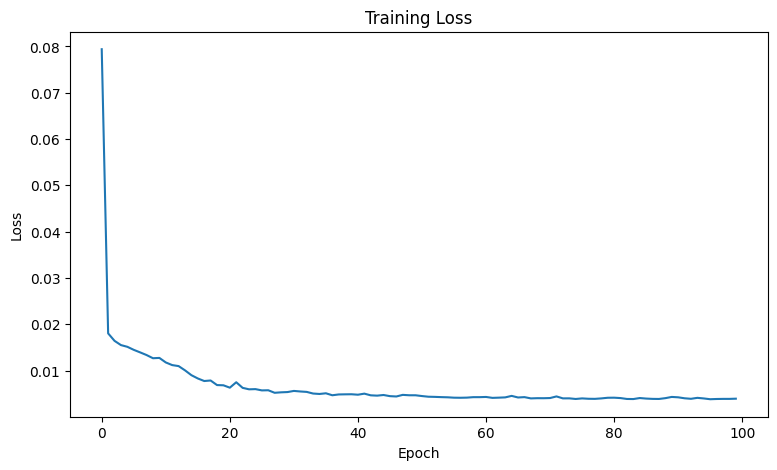

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 5))
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [35]:
# Lấy dữ liệu cuối cùng trong tập dữ liệu huấn luyện để dự đoán ngày tiếp theo
last_sequence = X_train[-1]
predicted_temperatures = []

for _ in range(30):
    prediction = model.predict(last_sequence.reshape(1, window_size, len(features)))  # Dự đoán nhiệt độ cao nhất
    predicted_temperature = prediction[0][0]
    predicted_temperatures.append(predicted_temperature)

    # Cập nhật chuỗi dữ liệu cuối cùng để dự đoán ngày tiếp theo
    last_sequence = np.roll(last_sequence, -1, axis=0)  # Đẩy các giá trị sang trái
    last_sequence[-1] = predicted_temperature

    print(last_sequence)

print("Dự đoán nhiệt độ cho 30 ngày tới:", predicted_temperatures)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
[[0.84744094 0.97314629 0.98565737 0.9623699 ]
 [0.70045932 0.81202405 0.92948207 0.85988791]
 [0.6332021  0.78917836 0.90836653 0.85108086]
 [0.71489501 0.83527054 0.93824701 0.87830264]
 [0.75656168 0.8745491  0.96613546 0.91152922]
 [0.76115486 0.89058116 0.987251   0.94155324]
 [0.72244094 0.88176353 0.99442231 0.95116093]
 [0.60400262 0.8244489  0.94820717 0.90272218]
 [0.64130098 0.64130098 0.64130098 0.64130098]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[0.70045932 0.81202405 0.92948207 0.85988791]
 [0.6332021  0.78917836 0.90836653 0.85108086]
 [0.71489501 0.83527054 0.93824701 0.87830264]
 [0.75656168 0.8745491  0.96613546 0.91152922]
 [0.76115486 0.89058116 0.987251   0.94155324]
 [0.72244094 0.88176353 0.99442231 0.95116093]
 [0.60400262 0.8244489  0.94820717 0.90272218]
 [0.64130098 0.64130098 0.64130098 0.64130098]
 [0.517968   0.517968   0.517968   0.517968  ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[[0.6332021  0.78917836 0.90836653 0.

In [36]:
# Đảo chuẩn hóa kết quả dự đoán trở lại thành đơn vị thực tế
import sklearn
convert = sklearn.preprocessing.MinMaxScaler()
data_maxtemp = data['maxtemp'].values.reshape(-1,1)
convert.fit_transform(data_maxtemp)

predicted_temperatures = np.array(predicted_temperatures).reshape(-1, 1)
predicted = convert.inverse_transform(predicted_temperatures)
predicted

array([[30.336853],
       [26.577663],
       [26.813253],
       [27.580746],
       [28.040773],
       [28.371067],
       [28.714512],
       [29.120567],
       [29.611397],
       [30.200985],
       [30.709408],
       [31.069023],
       [31.290222],
       [31.399227],
       [31.430029],
       [31.418743],
       [31.394798],
       [31.376312],
       [31.370415],
       [31.376257],
       [31.389254],
       [31.404354],
       [31.417723],
       [31.427307],
       [31.432695],
       [31.434593],
       [31.43422 ],
       [31.432802],
       [31.431273],
       [31.43015 ]], dtype=float32)

In [ ]:
df = pd.DataFrame({
    'FutureMaxTemp': predicted.flatten(),
})

# Lưu DataFrame vào tệp
df.to_csv('/data/predict/FutureMaxtemp_V.csv', index=False)
print("Đã lưu dữ liệu vào file FutureMaxtemp_V.csv")

Đã lưu dữ liệu vào file FutureMaxtemp_DAV.csv


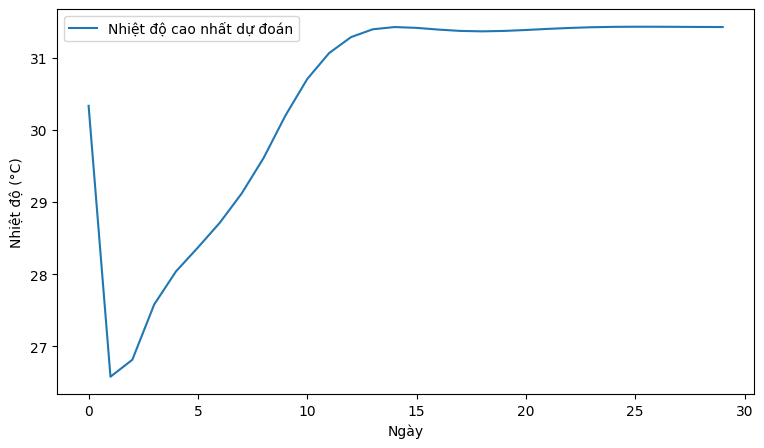

In [38]:
plt.figure(figsize=(9, 5))
plt.plot(predicted[:,0], label='Nhiệt độ cao nhất dự đoán')
plt.xlabel('Ngày')
plt.ylabel('Nhiệt độ (°C)')
plt.legend()
plt.show()

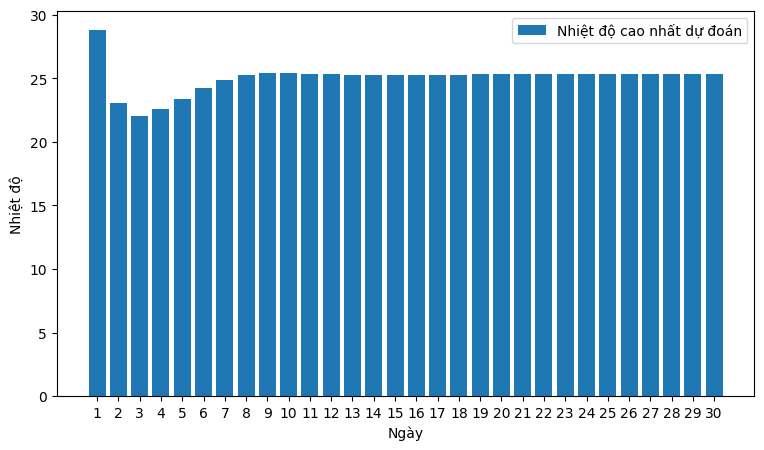

In [26]:
x = np.arange(len(predicted[:, 0]))

plt.figure(figsize=(9, 5))
plt.bar(x, predicted[:, 0], label='Nhiệt độ cao nhất dự đoán')
plt.xlabel('Ngày')
plt.ylabel('Nhiệt độ')
plt.xticks(x, x + 1) # Adjusting the labels to match the number of ticks
plt.legend()
plt.show()